# Import Library

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle

import numpy as np

import matplotlib.pyplot as plt

# Data Load
- 데이터 출처 : [Pima Indians Diabetes Database](https://www.kaggle.com/uciml/pima-indians-diabetes-database)

> Data Explain
- pima indian의 사람들을 대상으로 여러 정보를 취합하여 당뇨병의 유무를 진단하기 위한 데이터
- 수집 대상은 21세 이상의 여성이다.

In [ ]:
data = pd.read_csv('diabetes.csv')

In [ ]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


> Data Feature Information
- Pregnancies : 임신 횟수
- Glucose : 혈당 (보통 공복 후 측정한 혈당이 126 mg/dL 이상인 경우 당뇨병으로 진단), 즉 굉장히 중요한 feature
- Blood Pressure : 혈압
- Skin Thickness : 피부 두께
- Insulin : 인슐린 분비량
- BMI : 체질량 지수
- Diabetes Pedigree Function : 당뇨 혈통 기능? (당뇨의 유전을 이야기 하는 듯?)
- Age : 나이

In [ ]:
col_names = list(data.columns)

feature = col_names[:-1]
label = col_names[-1]

In [ ]:
print("당뇨 여부 class : ", col_names[-1])

당뇨 여부 class :  Outcome


# Data Exploration

### Find Null

In [ ]:
data.shape

(768, 9)

In [ ]:
pd.isnull(data).sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### Data Type

In [ ]:
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

> class를 나타내는 Outcome을 제외하면 모두 연속형 변수이다.

### Class Ratio

In [ ]:
group = data.groupby('Outcome')

In [ ]:
print("당뇨병   : ", group.count()['Age'][1])
print("당뇨병 X : ", group.count()['Age'][0])

당뇨병   :  268
당뇨병 X :  500


> 수집된 데이터에서 당뇨병 환자가 환자가 아닌 경우에 비해 절반이다. 데이터가 불균형하기 때문에 훈련 할 때에는 균형을 맞출 필요가 있다.

### 당뇨병 vs 정상

In [ ]:
group.apply(lambda x : x.describe())[feature]

Pregnancies     Glucose  ...  DiabetesPedigreeFunction         Age
Outcome                                 ...                                      
0       count   500.000000  500.000000  ...                500.000000  500.000000
        mean      3.298000  109.980000  ...                  0.429734   31.190000
        std       3.017185   26.141200  ...                  0.299085   11.667655
        min       0.000000    0.000000  ...                  0.078000   21.000000
        25%       1.000000   93.000000  ...                  0.229750   23.000000
        50%       2.000000  107.000000  ...                  0.336000   27.000000
        75%       5.000000  125.000000  ...                  0.561750   37.000000
        max      13.000000  197.000000  ...                  2.329000   81.000000
1       count   268.000000  268.000000  ...                268.000000  268.000000
        mean      4.865672  141.257463  ...                  0.550500   37.067164
        std       3.741239   31.939622  ...                  0.372354   10.968254
        min       0.000000    0.000000  ...                  0.088000   21.000000
        25%       1.750000  119.000000  ...                  0.262500   28.000000
        50%       4.000000  140.000000  ...                  0.449000   36.000000
        75%       8.000000  167.000000  ...                  0.728000   44.000000
        max      17.000000  199.000000  ...                  2.420000   70.000000

[16 rows x 8 columns]

In [ ]:
group.mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


> 당뇨병이 있는 사람은 기본적으로 모두 다 높게 나오는 편이다. 특히 혈당과 인슐린 수치, BMI에서 큰 차이를 보인다.

# Data Preprocessing

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(data[feature], data[label], test_size=0.3, random_state=1)

In [ ]:
x_train.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
88,15,136,70,32,110,37.1,0.153,43
467,0,97,64,36,100,36.8,0.600,25
550,1,116,70,28,0,27.4,0.204,21


In [ ]:
y_train.head(3)

88     1
467    0
550    0
Name: Outcome, dtype: int64

In [ ]:
# 분리된 데이터에서의 클래스 분포
print("당뇨병   : ", sum(y_test))
print("당뇨병 X : ", len(y_test) - sum(y_test))

당뇨병   :  85
당뇨병 X :  146


> train_test_split 함수는 클래스의 비율을 균등하게 유지하지 못한다. 우리는 이것을 인지하고 데이터를 다시 구성하려고 한다.

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(data[feature], data[label], test_size=0.3, random_state=1, stratify=data[label])

In [ ]:
268 * 0.7

187.6

In [ ]:
data_shuffled = shuffle(data)

In [ ]:
eq_train_x_0 = data_shuffled[data_shuffled['Outcome'] == 0][feature][:187]
eq_train_x_1 = data_shuffled[data_shuffled['Outcome'] == 1][feature][:187]

eq_train_x = pd.concat([eq_train_x_0, eq_train_x_1])
eq_train_y = np.concatenate(([0] * len(eq_train_x_0), [1] * len(eq_train_x_1)), axis=0)

eq_test_x_0 = data_shuffled[data_shuffled['Outcome'] == 0][feature][187:]
eq_test_x_1 = data_shuffled[data_shuffled['Outcome'] == 1][feature][187:]

eq_test_x = pd.concat([eq_test_x_0, eq_test_x_1])
eq_test_y = np.concatenate(([0] * len(eq_test_x_0), [1] * len(eq_test_x_1)), axis=0)

In [ ]:
print(eq_train_x.shape, len(eq_train_y))
print(eq_test_x.shape, len(eq_test_y))

(374, 8) 374
(394, 8) 394


# Modeling

### Model 1

In [ ]:
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

### Model 2

In [ ]:
clf2 = DecisionTreeClassifier()
clf2.fit(eq_train_x, eq_train_y)

y_pred2 = clf2.predict(eq_test_x)

# Model Evaluation

In [ ]:
print('accuracy : ', accuracy_score(y_test, y_pred))

accuracy :  0.6926406926406926


In [ ]:
print('accuracy : ', accuracy_score(eq_test_y, y_pred2))

accuracy :  0.6954314720812182


> ~~엥? 더 떨어졌네?? ㅋㅋㅋ~~ (학습 데이터의 클래스를 잘못 할당함... ㅋㅋ)  
그래도 비슷한 성능을 보인다..

# Model Visualization

In [ ]:
from sklearn import tree
import graphviz

In [ ]:
dot_data = tree.export_graphviz(clf, out_file = None,
                                feature_names = feature,  
                                class_names = label,
                                filled = True)

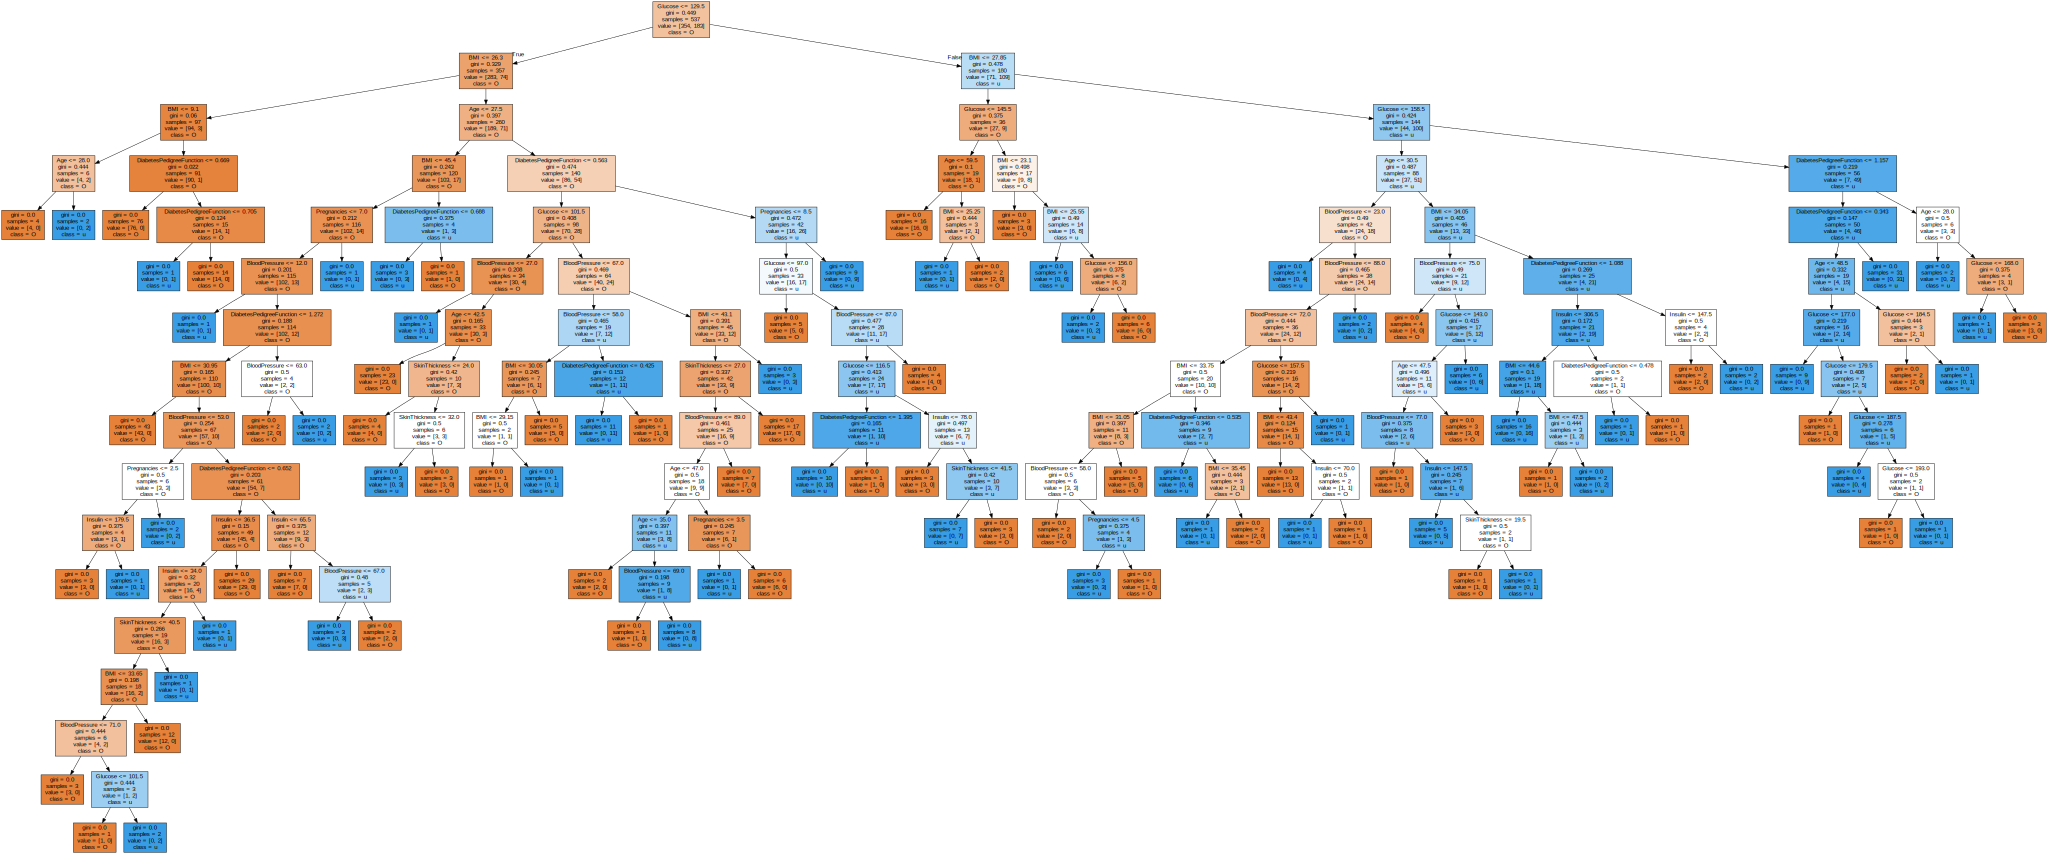

In [ ]:
graph = graphviz.Source(dot_data, format="png") 
graph

In [ ]:
!pip install dtreeviz

     |████████████████████████████████| 62 kB 696 kB/s 
  Created wheel for dtreeviz: filename=dtreeviz-1.3.2-py3-none-any.whl size=67936 sha256=c10df72ec824ee26f9e725a93682f4f26c8a25a77f39f77aeaf6c06590058b8d
  Stored in directory: /root/.cache/pip/wheels/9d/29/a1/f2ad20de79875e749330d5c6234fc5f517991fcaa23d7a3d0f
Successfully built dtreeviz


In [ ]:
from dtreeviz.trees import dtreeviz

viz = dtreeviz(clf, x_train, y_train,
                target_name = "target",
                feature_names = feature,
                class_names = label)

viz

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


# Decision Tree 가지치기

### Post Pruning

In [ ]:
path = clf2.cost_complexity_pruning_path(eq_train_x, eq_train_y)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
print(ccp_alphas)

[0.         0.00200104 0.00237671 0.00237671 0.00245098 0.00247574
 0.00250668 0.00259952 0.00320856 0.00330579 0.00356506 0.00380273
 0.00380273 0.0039287  0.0040107  0.00413223 0.00442096 0.00442356
 0.00445633 0.00445633 0.00445633 0.00452227 0.00486223 0.00534759
 0.00585399 0.00590463 0.00616089 0.00713012 0.00727867 0.00745021
 0.00773491 0.00828877 0.0084237  0.00937527 0.01051288 0.01099147
 0.01130835 0.01297752 0.0182325  0.0218201  0.0230369  0.02428085
 0.09026874]


In [ ]:
# For each alpha we will append our model to a list
clfs = []
for ccp_alpha in ccp_alphas:
    clf = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(eq_train_x, eq_train_y)
    clfs.append(clf)

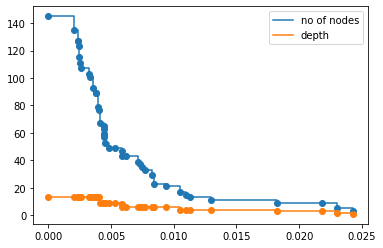

In [ ]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]
node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
plt.scatter(ccp_alphas,node_counts)
plt.scatter(ccp_alphas,depth)
plt.plot(ccp_alphas,node_counts,label='no of nodes',drawstyle="steps-post")
plt.plot(ccp_alphas,depth,label='depth',drawstyle="steps-post")
plt.legend()
plt.show()

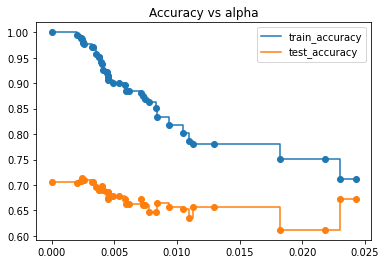

In [ ]:
train_acc = []
test_acc = []
for c in clfs:
    y_train_pred = c.predict(eq_train_x)
    y_test_pred = c.predict(eq_test_x)
    train_acc.append(accuracy_score(y_train_pred,eq_train_y))
    test_acc.append(accuracy_score(y_test_pred,eq_test_y))

plt.scatter(ccp_alphas,train_acc)
plt.scatter(ccp_alphas,test_acc)
plt.plot(ccp_alphas,train_acc,label='train_accuracy',drawstyle="steps-post")
plt.plot(ccp_alphas,test_acc,label='test_accuracy',drawstyle="steps-post")
plt.legend()
plt.title('Accuracy vs alpha')
plt.show()

최종 선택 : 0.005

In [ ]:
clf_final = tree.DecisionTreeClassifier(random_state=0,ccp_alpha=0.005)
clf_final.fit(eq_train_x, eq_train_y)

y_pred_final = clf_final.predict(eq_test_x)

In [ ]:
print('accuracy : ', accuracy_score(eq_test_y, y_pred_final))

accuracy :  0.6776649746192893


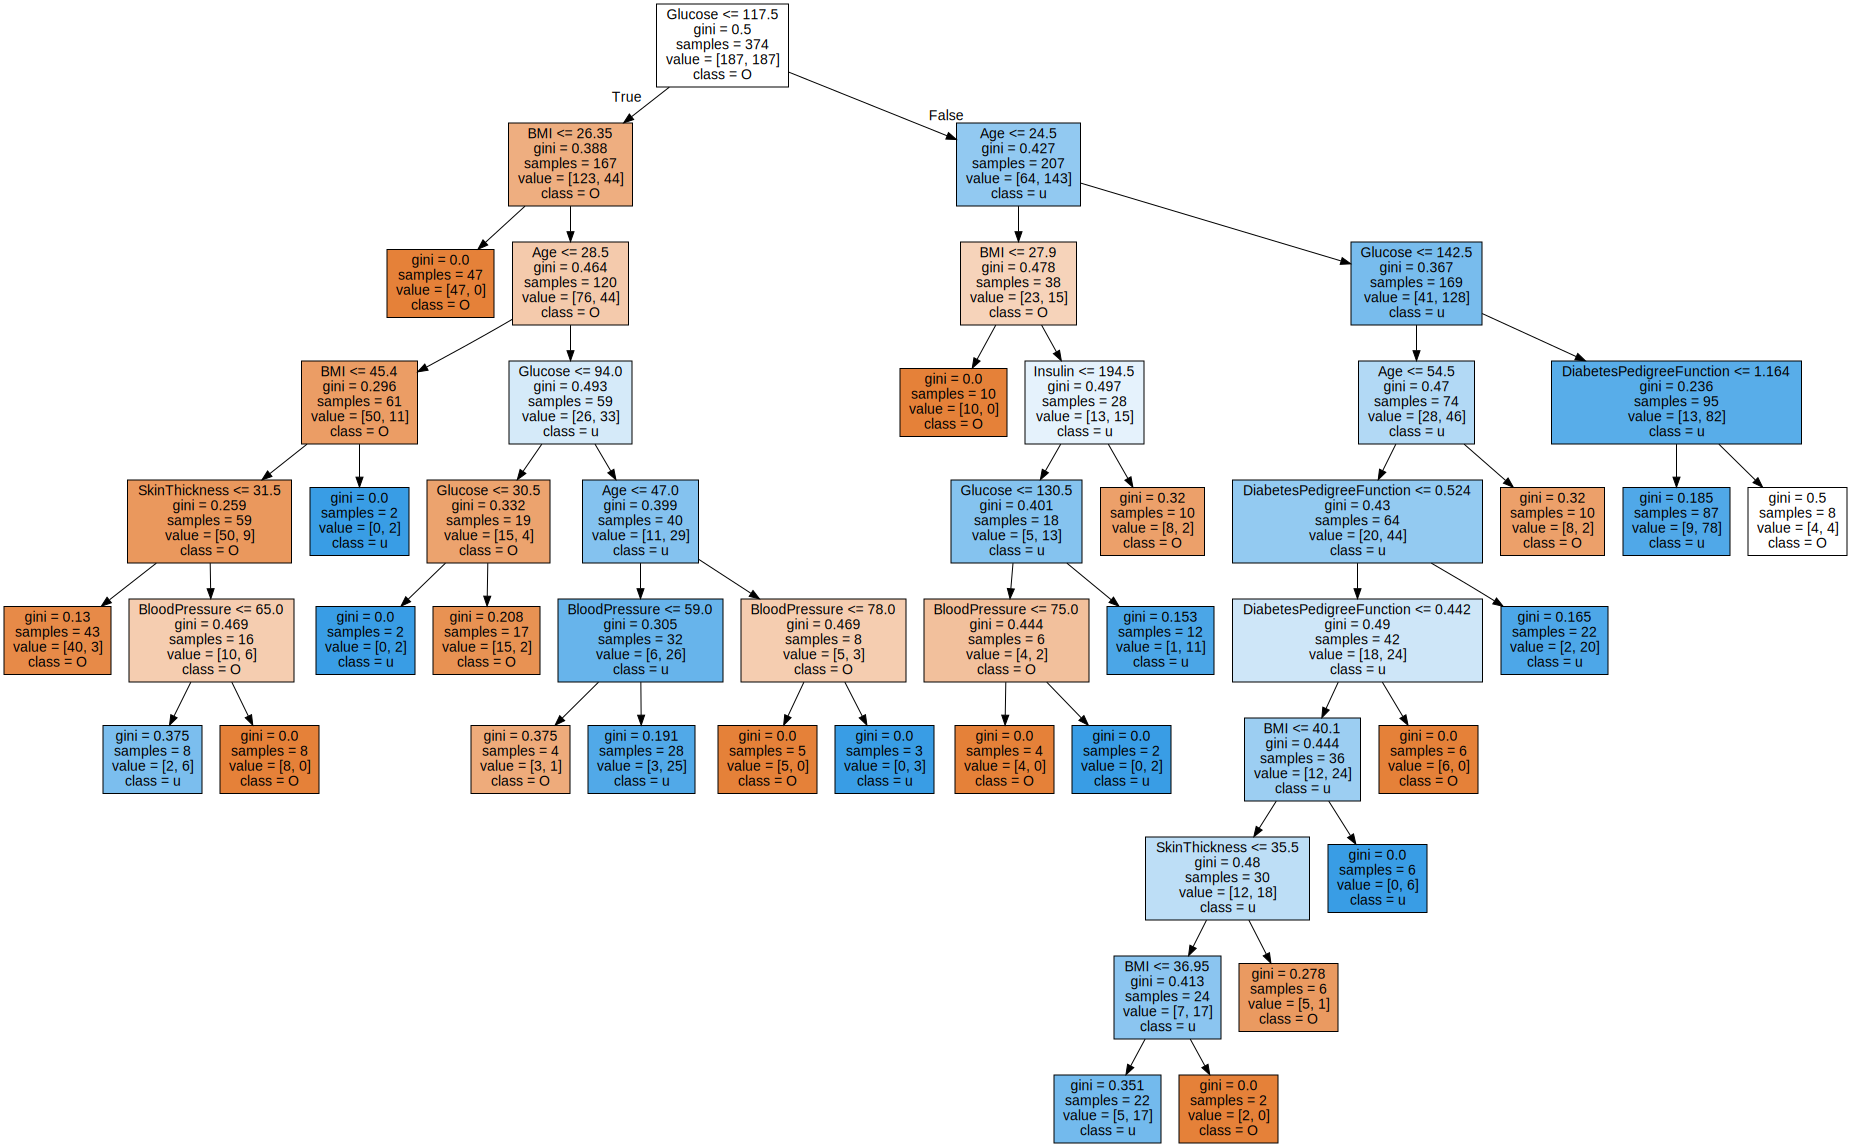

In [ ]:
dot_data = tree.export_graphviz(clf_final, out_file = None,
                                feature_names = feature,  
                                class_names = label,
                                filled = True)

graph = graphviz.Source(dot_data, format="png") 
graph

# Summary

- 당뇨병 환자 데이터를 이용하여 당뇨병 진단 알고리즘을 만들었다.
- 진단 알고리즘은 Decision Tree를 선택하였다.
- Decision Tree를 만들고, 시각화와 Post Pruning 까지 진행하엿다.
- 좋은 성능을 내기 위해서는 데이터에 대한 분석을 더 진행해야 할 듯하다.
- 최종 성능 accuracy : 0.678